In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

In [11]:
def load_results(results_folder):
    dfs = {}
    folders = os.listdir(results_folder)

    for f in folders:
        fsplit = f.split("_")
        lvl = fsplit[2]
        n1 = fsplit[3]
        n2 = fsplit[4]


        contents = os.listdir(results_folder + "/" + f)
        if 'simulation_results' in contents:
            c2 = os.listdir(results_folder + "/" + f + "/" + "simulation_results")
            for c in c2:
                if c.endswith('.csv'):
                    df = pd.read_csv(results_folder + "/" + f + "/" + "simulation_results" + "/" + c)

                    dfs[(int(lvl), int(n1), int(n2))] = df

    return dfs

In [18]:
dfs_cbs = load_results('results2')
dfs_prio = load_results('results_prioritized_2')
dfs_dist_2 = load_results('results_distributed_2')
dfs_dist_4 = load_results('results_distributed_4')
dfs_dist_6 = load_results('results_distributed_6')

(0.0, 1.0)

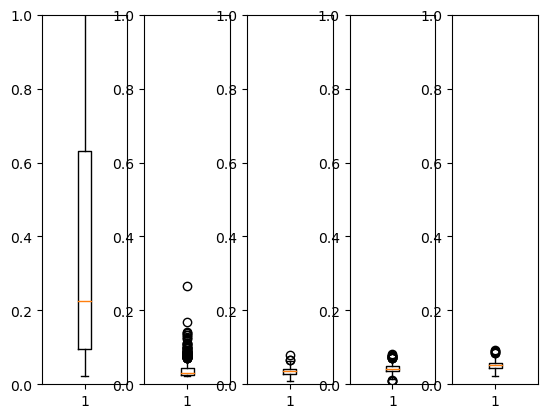

In [19]:
plt.subplot(151)
plt.boxplot(dfs_cbs[(2, 3, 3)]["Computation time"].dropna())
plt.ylim(0, 1)

plt.subplot(152)
plt.boxplot(dfs_prio[(2, 3, 3)]["Computation time"].dropna())
plt.ylim(0, 1)

plt.subplot(153)
plt.boxplot(dfs_dist_2[(2, 3, 3)]["Computation time"].dropna())
plt.ylim(0, 1)

plt.subplot(154)
plt.boxplot(dfs_dist_4[(2, 3, 3)]["Computation time"].dropna())
plt.ylim(0, 1)

plt.subplot(155)
plt.boxplot(dfs_dist_6[(2, 3, 3)]["Computation time"].dropna())
plt.ylim(0, 1)

In [72]:
def get_vals(lvl, variable, func, dfs):

    x = [1, 2, 3, 4, 5, 6, 7, 8, 9]
    y = [1, 2, 3, 4, 5, 6, 7, 8, 9]
    X, Y = np.meshgrid(x, y)

    Z = []


    for xxyy in zip(X, Y):
        zz = []
        for i in range(len(xxyy[0])):
            x = xxyy[0][i]
            y = xxyy[1][i]

            try:

                if y > x:
                    if variable == 'Cost':
                        m = func(dfs[(lvl, x, y)][variable].dropna() / (x + y))
                    else:
                        m = func(dfs[(lvl, x, y)][variable].dropna())
                else:
                    if variable == 'Cost':
                        m = func(dfs[(lvl, y, x)][variable].dropna() / (x + y))
                    else:
                        m = func(dfs[(lvl, y, x)][variable].dropna())

            except KeyError:
                m = np.nan

            zz.append(m)
        
        Z.append(zz)

    Z = np.array(Z)

    return X, Y, Z


TypeError: get_vals() missing 1 required positional argument: 'func'

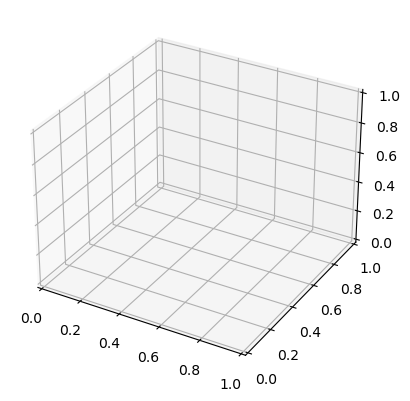

In [5]:
ax = plt.axes(projection='3d')
#ax.zaxis._set_scale('log')
X, Y, Z = get_vals(2, 'Cost')
ax.plot_surface(X, Y, Z, cmap='viridis')

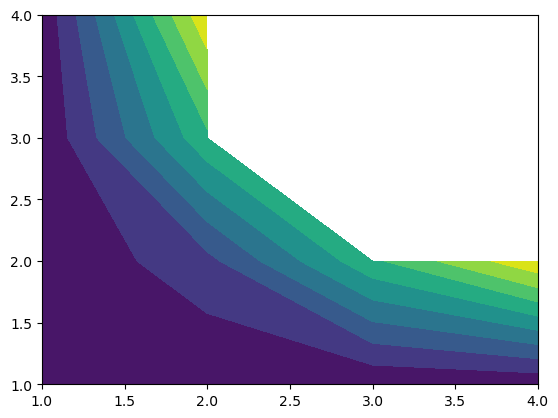

In [125]:
ax = plt.axes()
ax.contourf(X, Y, Z, levels=10)

0.010926317567431874 32.23194327866665
0.0022895097000861803 4.945985432190863
0.0022895097000861803 4.945985432190863
0.0022895097000861803 4.945985432190863
0.0022895097000861803 4.945985432190863


/tmp/ipykernel_746622/1051640521.py:58: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


0.006421127469965272 70.97877116346305
0.0006774708680816159 2.567780406215494
0.0006774708680816159 2.567780406215494
0.0006774708680816159 2.567780406215494
0.0006774708680816159 2.567780406215494
23.22236503856041 48.666666666666664
23.22236503856041 48.666666666666664
23.22236503856041 48.666666666666664
23.22236503856041 48.666666666666664
23.22236503856041 48.666666666666664
0.29377544125607913 6.662777083232036
0.29377544125607913 6.662777083232036
0.29377544125607913 6.662777083232036
0.29377544125607913 6.662777083232036
0.29377544125607913 6.662777083232036


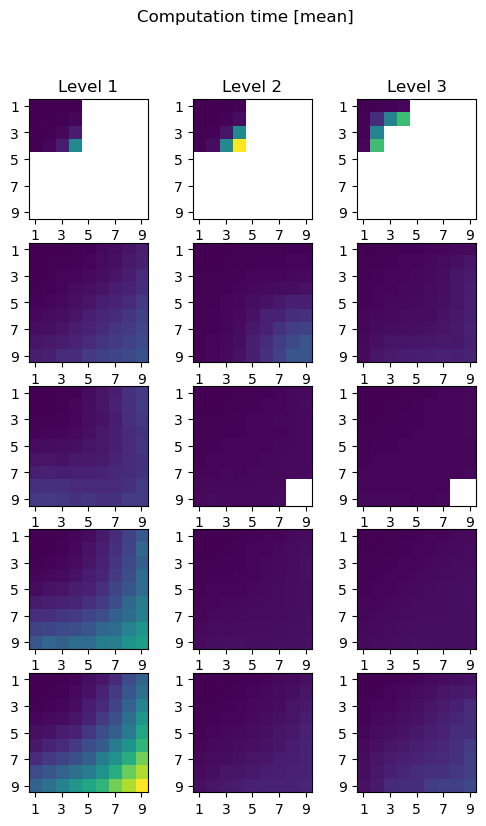

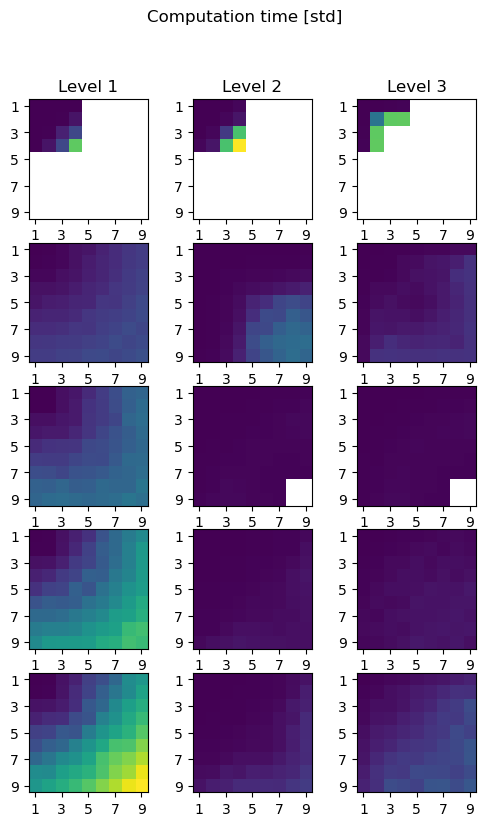

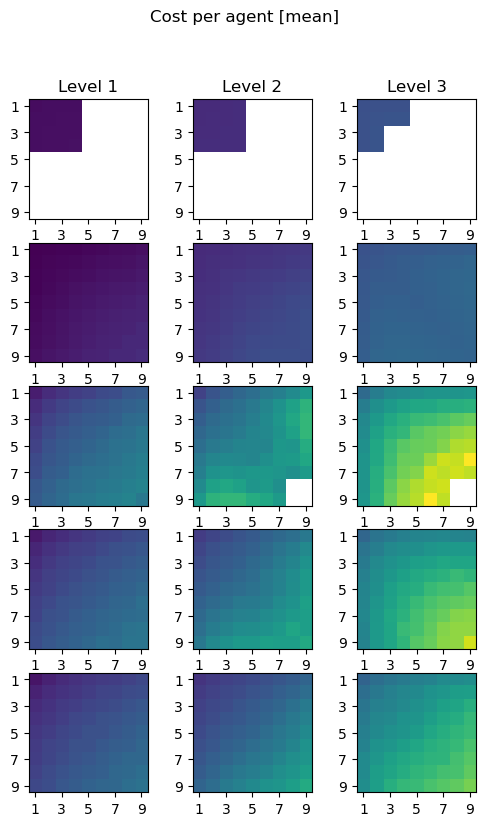

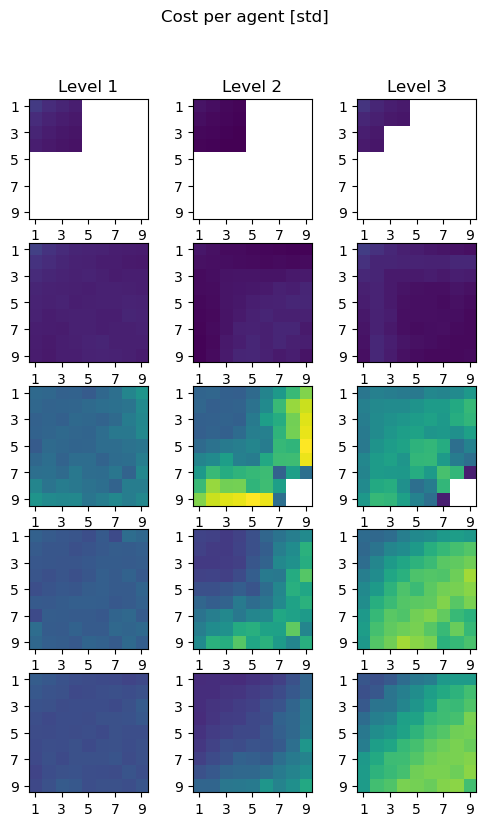

In [74]:
algs = [dfs_cbs, dfs_prio, dfs_dist_2, dfs_dist_4, dfs_dist_6]



for i, v in enumerate([('Computation time', 1.5, np.mean), ('Computation time', 60, np.std), ('Cost', 600, np.mean), ('Cost', 5, np.std)]):
    fig, axs = plt.subplots(len(algs), 3, figsize=(6, 9))
    
    mean_or_std = {
        np.mean: "[mean]",
        np.std: "[std]"
    }

    if v[0] == 'Cost':
        fig.suptitle(f'Cost per agent {mean_or_std[v[2]]}')
    else:
        fig.suptitle(f'{v[0]} {mean_or_std[v[2]]}')

    _vmin = np.nanmin([[get_vals(lvl, v[0], v[2], dfs=dfs)[2] for lvl in [1, 2, 3]] for dfs in algs[1:]])
    _vmax = np.nanmax([[get_vals(lvl, v[0], v[2], dfs=dfs)[2] for lvl in [1, 2, 3]] for dfs in algs[1:]])

    _vmin_cbs = np.nanmin([[get_vals(lvl, v[0], v[2], dfs=dfs)[2] for lvl in [1, 2, 3]] for dfs in algs[:1]])
    _vmax_cbs = np.nanmax([[get_vals(lvl, v[0], v[2], dfs=dfs)[2] for lvl in [1, 2, 3]] for dfs in algs[:1]])
    
    for j, dfs in enumerate(algs):

        if j == 0 and i in [0, 1]:
            vmin = _vmin_cbs
            vmax = _vmax_cbs
        elif i in [0, 1]:
            vmin = _vmin
            vmax = _vmax
        else:
            vmin = min(_vmin, _vmin_cbs)
            vmax = max(_vmax, _vmax_cbs)

        print(vmin, vmax)
        for lvl in [1, 2, 3]:
            ax = axs[j,lvl - 1]
            im = ax.imshow(get_vals(lvl, v[0], v[2], dfs=dfs)[2], vmin=vmin, vmax=vmax)
            
            ax.set_xticks([0, 2, 4, 6, 8])
            ax.set_xticklabels([str(a) for a in [1, 3, 5, 7, 9]])

            ax.set_yticks([0, 2, 4, 6, 8])
            ax.set_yticklabels([str(a) for a in [1, 3, 5, 7, 9]])

            if j == 0:

                titles = {
                    0: 'Level 1',
                    1: 'Level 2',
                    2: 'Level 3',
                }

                ax.set_title(titles[lvl - 1])

                
    fig.show()
        # fig.colorbar(im, ax=axs[i,:], orientation="vertical", shrink=1.1)

In [74]:
Z

array([[0        0.006584
1        0.006122
2        0.005504
3        0.006161
4        0.006154
           ...   
17907    0.006157
17908    0.015847
17909    0.007757
17910    0.005726
17911    0.015122
Name: Computation time, Length: 17912, dtype: float64,
        0        0.010006
1        0.010340
2        0.009512
3        0.009992
4        0.010417
           ...   
11686    0.010351
11687    0.010616
11688    0.045549
11689    0.029691
11690    0.083823
Name: Computation time, Length: 11691, dtype: float64,
        0        0.021218
1        0.012026
2        0.012914
3        0.011838
4        0.015619
           ...   
11874    0.022359
11875    0.043896
11876    0.025084
11877    0.150259
11878    3.874741
Name: Computation time, Length: 11879, dtype: float64,
        0        0.018339
1        0.015834
2        0.015262
3        0.014925
4        0.017058
           ...   
12682    0.090568
12683    0.062101
12684    0.099367
12685    0.111592
12686    0.146809
Name: Compu

In [ ]:
fig, axs = plt.subplots(4, 3, figsize=(6, 8))
for i, v in enumerate([('Computation time', 30, np.mean), ('Computation time', 60, np.std), ('Cost', 200, np.mean), ('Cost', 5, np.std)]):
    for lvl in [1, 2, 3]:
        ax = axs[i,lvl - 1]
        im = ax.imshow(get_vals(lvl, v[0], v[2])[2], vmin=0, vmax=v[1])
    fig.colorbar(im, ax=axs[i,:], orientation="vertical", shrink=1.1)